In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from surface_dynamics.databases.flat_surfaces import CylinderDiagrams
from surface_dynamics import AbelianStratum

In [4]:
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(1, 2)

In [5]:
C = CylinderDiagrams()
a = AbelianStratum(3,1).unique_component()
l = list(C.get_iterator(a, 4))
l

[(0)-(2) (1,2,3)-(4,5) (4)-(3) (5)-(0,1),
 (0,3)-(5) (1)-(2) (2,5)-(3,4) (4)-(0,1),
 (0,1)-(0,2) (2)-(3) (3,4)-(1,5) (5)-(4),
 (0,1)-(0,4,5) (2,3)-(1) (4)-(2) (5)-(3)]

In [37]:
cd = l[0]
print(cd.degree())
cd.cylinders()

6


[((0,), (2,)), ((1, 2, 3), (4, 5)), ((4,), (3,)), ((5,), (0, 1))]

In [33]:
class CylinderClasses:
    def __init__(self, cyl_diag, classes):
        self.cyl_diag = cyl_diag
        self.classes = classes

def valid_cylinder_equivalence_classes(cyl_diag, num_classes, free_cylinders = True):
    cylinders = cyl_diag.cylinders()
    
    digraph_data = [[None, None] for _ in range(cd.degree())]
    for i, (bot, top) in enumerate(cyl_diag.cylinders()):
        for separatrix in bot:
            digraph_data[separatrix][0] = i
        for separatrix in top:
            digraph_data[separatrix][1] = i
    print(digraph_data)
    
    G = nx.DiGraph()
    G.add_nodes_from(range(len(cylinders)))
    for source, dest in digraph_data:
        G.add_edge(source, dest)
    
    nx.draw(G, with_labels=True, font_weight='bold')

[[0, 3], [1, 3], [1, 0], [1, 2], [2, 1], [3, 1]]


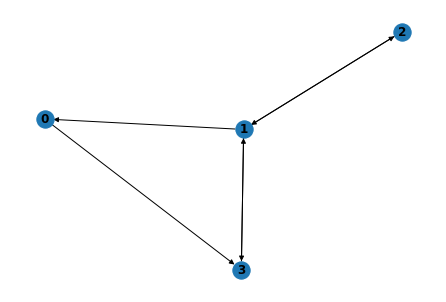

In [34]:
valid_cylinder_equivalence_classes(cd, 2)